In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load your dataset
df = pd.read_csv('datasets/bank-direct-marketing-campaigns.csv')

# Initialize LabelEncoder
le = LabelEncoder()



In [26]:
df.columns
df.drop(['month', 'day_of_week','previous',
       'poutcome','euribor3m', 'nr.employed'],axis=1)

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,1,999,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,1,999,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,2,999,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,1,999,-1.1,94.767,-50.8,yes


In [27]:
# Encode all columns with categorical textual data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [28]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [29]:
# Splitting the dataset into features and target variable
X = df.drop('y', axis=1)  # 'y' is the target variable
y = df['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

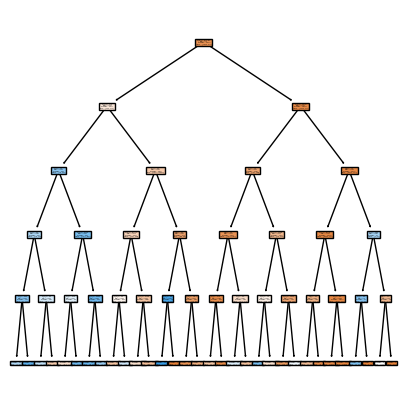

In [30]:
plt.figure(figsize=(5,5))
plot_tree(model, filled=True)
plt.show()

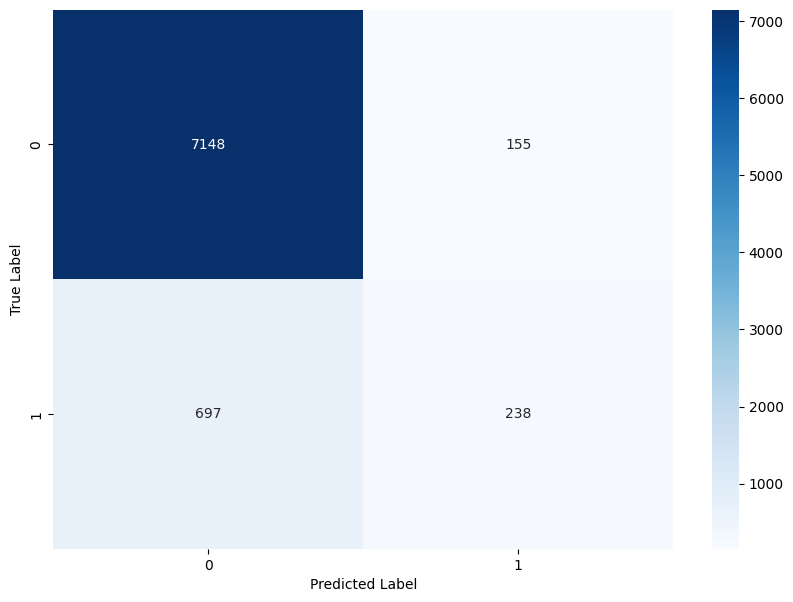

In [31]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Simulating the IMDb sentiment dataset
data = {
    'review': [
        "Great movie! Must watch", "It was terribly boring", "Loved the cinematography!",
        "The plot was predictable", "Laughed till the end!", "Worst movie ever",
        "It was a fantastic experience", "Not my cup of tea", "An absolute thrill-ride",
        "I fell asleep halfway through", "Brilliantly executed", "Felt it was too long"
    ],
    'sentiment': [
        'positive', 'negative', 'positive', 'negative', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative', 'positive', 'negative'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Assuming we want to create a balanced subset of 10 reviews
# Stratify and split the data to ensure balance
train_df, test_df = train_test_split(df, test_size=10, stratify=df['sentiment'], random_state=42)

# Save the subset to CSV
test_df.to_csv('datasets/imdb_subset.csv', index=False)